## Quant Finance - Clase 7 - Delta-hedging

In [1]:
from math import log, sqrt, exp
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np

#### Formula de Black-Scholes:

In [2]:
def BSFormula(S_t, t, T, K, v, r, f):
    d_plus  = ( log( S_t/K ) + ( r + v**2 / 2 ) * (T-t) ) / ( v * sqrt( T-t ) )  
    d_minus = ( log( S_t/K ) + ( r - v**2 / 2 ) * (T-t) ) / ( v * sqrt( T-t ) )
    df = exp( -r * (T-t) )
    return f * ( norm.cdf(f * d_plus) * S_t - norm.cdf(f * d_minus) * K * df )

#### Seteamos los parametros fijos:

In [3]:
S_t = 42
t = 0 
T = 1
K = 50
v = 0.5
r = 0.1
drift = 0.5
f = 1 # setea una call

#### Definimos el número de pasos de la simulación:

In [4]:
N = 1000
dt = 1/N
t = np.linspace(0, 1, N+1)

#### Seteamos el número de veces que rebalancearemos el portfolio

In [5]:
M = 50

#### Simulamos la dinámica del stock y calculamos el valor teorico del call:

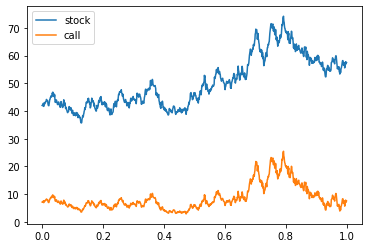

In [6]:
S = [0 for i in range(N+1)]
c = [0 for i in range(N+1)]
S[0] = S_t #valor inicial

for i in range(N):
    dS = drift * S[i] * dt + v * S[i] * np.random.normal(0, 1) * sqrt(dt)
    S[i+1] = S[i] + dS      

for i in range(N):
    c[i] = BSFormula(S[i], t[i], T, K, v, r, f)

c[N] = max(S[N] - K, 0) #Calculamos aparte ya que BS no esta definida en t=T

plt.plot(t, S, label = 'stock')
plt.plot(t, c, label = 'call')

plt.legend(loc='upper left')
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.show()

#### Calculamos el valor de delta para cada t

In [7]:
delta = [0 for i in range(N+1)]

d_plus = [( log( S[i]/K ) + ( r + v**2 / 2 ) * (T-t[i]) ) / ( v * sqrt( T-t[i] ) ) for i in range(N)]

for i in range(N):
    delta[i] = norm.cdf(f * d_plus[i]) 

delta[N] = max(S[N] - K, 0) / (S[N] - K)  #Calculamos aparte ya que BS no esta definida en t=T

#### Calculamos el valor del hedge para cada t

In [8]:
h = [0 for i in range(N+1)]
delta_hedge = [0 for i in range(N+1)]

z = int(N / M)
h[0] = c[0]
for i in range(N):
    delta_hedge[i] = delta[( i // z ) * z]
    h[i+1] = delta_hedge[i] * S[i+1] + (h[i] - delta_hedge[i] * S[i]) * exp(r * dt)

In [9]:
S[N]

57.50219573601503

In [10]:
c[N]

7.502195736015032

In [11]:
h[N]

8.832660845896385

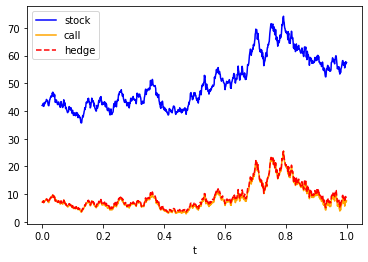

In [12]:
plt.plot(t, S, 'b', label = 'stock')
plt.plot(t, c, 'orange', label = 'call')
plt.plot(t, h, 'r--', label = 'hedge')

plt.legend(loc='upper left')
plt.title('')
plt.xlabel('t')
plt.ylabel('')
plt.show()

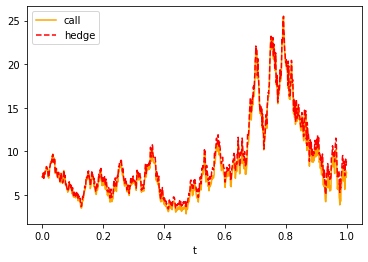

In [13]:
plt.plot(t, c, 'orange', label = 'call')
plt.plot(t, h, 'r--', label = 'hedge')

plt.legend(loc='upper left')
plt.title('')
plt.xlabel('t')
plt.ylabel('')
plt.show()